In [1]:
import os
PATH = 'C:/Users/user/DataPreprocessing/ModelingDataset/data'
os.chdir(PATH)

In [2]:
import pandas as pd
import numpy as np

In [4]:
dataset = pd.read_csv("./dataset_pre1.csv", sep = ',',encoding = 'cp949', index_col = 0)
dataset

,insertTime,mmsi,speed,shipLat,shipLon,tideLevel,windSpeed,windDirec,temp,pressure,totalWeight,shipUse,arrivalTime,rest_dist
0,2022-11-30 16:33:00,371369000,17.1,37.264305,126.245270,176.0,2.6,북서,-3.1,1032.6,18085,풀컨테이너선,1671087900,37055.892919
1,2022-12-29 23:23:00,371369000,10.0,36.960186,126.101601,517.0,2.2,서,2.7,1031.7,18085,풀컨테이너선,1672368900,69352.916750
2,2022-12-29 23:39:00,371369000,9.8,36.990513,126.137215,487.0,1.4,남서,2.4,1031.6,18085,풀컨테이너선,1672368900,64739.187778
3,2022-12-29 23:37:00,371369000,9.8,36.988640,126.134674,490.0,2.2,서남서,2.4,1031.6,18085,풀컨테이너선,1672368900,65043.247084
4,2022-12-29 23:40:00,371369000,9.7,36.993187,126.140976,485.0,1.9,남서,2.4,1031.6,18085,풀컨테이너선,1672368900,64297.611382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53297,2022-12-29 23:41:00,441174000,10.1,37.028133,126.192680,483.0,2.6,남남서,2.3,1031.6,16717,풀컨테이너선,1672368300,35499.387933
53298,2022-12-29 23:42:00,441174000,10.8,37.031849,126.197449,482.0,2.0,남서,2.3,1031.6,16717,풀컨테이너선,1672368300,35172.042374
53299,2022-12-29 23:43:00,441174000,11.1,37.033585,126.199715,480.0,1.8,서남서,2.2,1031.6,16717,풀컨테이너선,1672368300,34393.687393
53300,2022-12-29 23:48:00,441174000,11.5,37.043816,126.213150,470.0,2.1,남서,2.3,1031.6,16717,풀컨테이너선,1672368300,34573.073957


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53302 entries, 0 to 53301
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   insertTime   53302 non-null  object 
 1   mmsi         53302 non-null  int64  
 2   speed        53302 non-null  float64
 3   shipLat      53302 non-null  float64
 4   shipLon      53302 non-null  float64
 5   tideLevel    53302 non-null  float64
 6   windSpeed    53302 non-null  float64
 7   windDirec    53302 non-null  object 
 8   temp         53302 non-null  float64
 9   pressure     53302 non-null  float64
 10  totalWeight  53302 non-null  int64  
 11  shipUse      53302 non-null  object 
 12  arrivalTime  53302 non-null  int64  
 13  rest_dist    53302 non-null  float64
dtypes: float64(8), int64(3), object(3)
memory usage: 6.1+ MB


### 1. 단위 통일
- knot -> m/s
- m/.s = Kn/1.944

In [6]:
dataset['speed'] = dataset['speed']/1.944

### 2. 이상치 확인, 제거
- Z-scores

In [7]:
# 이상치 확인 함수 
def detect_outliers(data):
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    outliers=[]
    for x in data:
        z_score= (x - mean) / std 
        if np.abs(z_score) > threshold:
            outliers.append(x)
    return outliers

In [8]:
# 선박 위도 이상치
shipLat = dataset.loc[:,"shipLat"].to_list()
shipLat_outliers = detect_outliers(shipLat)
# print("shipLat_outliers: ", shipLat_outliers)
len(shipLat_outliers)
print(set(shipLat_outliers))

# 선박 경도 이상치 확인
shipLon = dataset.loc[:,"shipLon"].to_list()
shipLon_outliers = detect_outliers(shipLon)
# print("shipLon_outliers: ", shipLon_outliers)
len(shipLon_outliers)
print(set(shipLon_outliers))

{91.0}
{181.0}


In [9]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
# matplotlib.rcParams['font.family'] = 'Apple Gothic'  # Mac용 
matplotlib.rcParams['font.size'] = 15  # 글자크기

matplotlib.rcParams['axes.unicode_minus'] = False

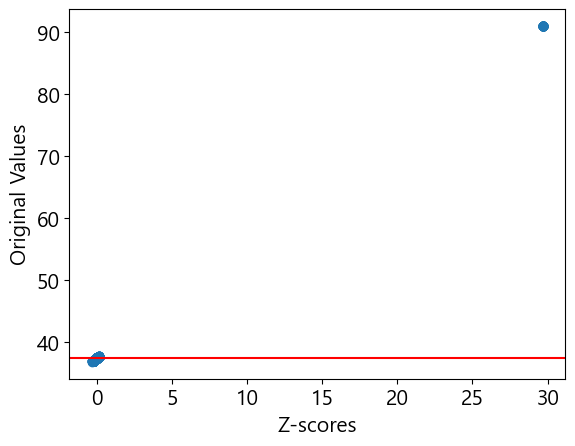

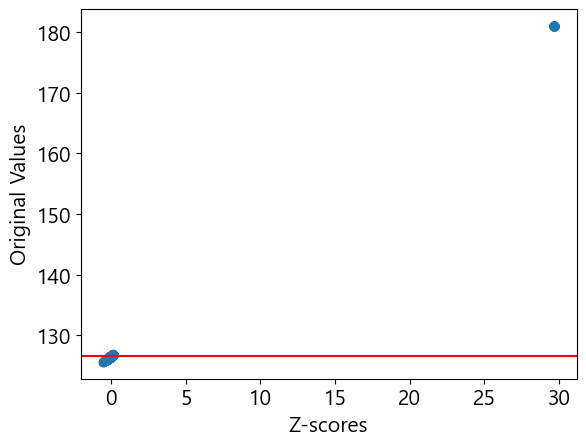

In [64]:
# 선박 위도,경도 이상치 시각화 
def z_score_plot(data):
    mean = np.mean(data)
    std = np.std(data)
    
    z_scores = [(x - mean) / std for x in data]
    plt.scatter(z_scores, data)
    plt.axhline(y=mean, color='r', linestyle='-')
    plt.xlabel("Z-scores")
    plt.ylabel("Original Values")
    plt.show()
    
shipLat = dataset.loc[:,"shipLat"].to_list()
shipLon = dataset.loc[:,"shipLon"].to_list()

z_score_plot(shipLat)
z_score_plot(shipLon)

In [10]:
# 선박 위도 이상치 데이터 제거
dataset = dataset.drop(dataset[dataset['shipLat'] == 91.0 ].index )
# 선박 경도 이상치 데이터 제거
dataset = dataset.drop(dataset[dataset['shipLat'] == 181.0].index)

In [11]:
shipLat = dataset.loc[:,"shipLat"].to_list()
shipLon = dataset.loc[:,"shipLon"].to_list()

z_score_plot(shipLat)
z_score_plot(shipLon)

NameError: name 'z_score_plot' is not defined

In [12]:
dataset

,insertTime,mmsi,speed,shipLat,shipLon,tideLevel,windSpeed,windDirec,temp,pressure,totalWeight,shipUse,arrivalTime,rest_dist
0,2022-11-30 16:33:00,371369000,8.796296,37.264305,126.245270,176.0,2.6,북서,-3.1,1032.6,18085,풀컨테이너선,1671087900,37055.892919
1,2022-12-29 23:23:00,371369000,5.144033,36.960186,126.101601,517.0,2.2,서,2.7,1031.7,18085,풀컨테이너선,1672368900,69352.916750
2,2022-12-29 23:39:00,371369000,5.041152,36.990513,126.137215,487.0,1.4,남서,2.4,1031.6,18085,풀컨테이너선,1672368900,64739.187778
3,2022-12-29 23:37:00,371369000,5.041152,36.988640,126.134674,490.0,2.2,서남서,2.4,1031.6,18085,풀컨테이너선,1672368900,65043.247084
4,2022-12-29 23:40:00,371369000,4.989712,36.993187,126.140976,485.0,1.9,남서,2.4,1031.6,18085,풀컨테이너선,1672368900,64297.611382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53297,2022-12-29 23:41:00,441174000,5.195473,37.028133,126.192680,483.0,2.6,남남서,2.3,1031.6,16717,풀컨테이너선,1672368300,35499.387933
53298,2022-12-29 23:42:00,441174000,5.555556,37.031849,126.197449,482.0,2.0,남서,2.3,1031.6,16717,풀컨테이너선,1672368300,35172.042374
53299,2022-12-29 23:43:00,441174000,5.709877,37.033585,126.199715,480.0,1.8,서남서,2.2,1031.6,16717,풀컨테이너선,1672368300,34393.687393
53300,2022-12-29 23:48:00,441174000,5.915638,37.043816,126.213150,470.0,2.1,남서,2.3,1031.6,16717,풀컨테이너선,1672368300,34573.073957


In [13]:
dataset.to_csv("./dataset_final.csv", encoding = 'cp949')